In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


def scatterplot(df, tx, ty):
    """Generates scatterplot with line of best fit"""
    title = ty+" vs. "+tx
    plot = df.plot(kind='scatter', figsize=(10, 5), title=title, x=tx, y=ty)
    plot.set_xlabel(tx)
    plot.set_ylabel(ty)
    
    # Uncomment the two lines below and make appropriate edits to label a particular team in a graph
    #team_lbl = df.loc[df['Team'] == 'frc4308']
    #plot.annotate('frc4308', (team_lbl[tx], team_lbl[ty]), textcoords='offset points', xytext=(0, 5), ha='center')
    # Make sure the team is in the dataframe/csv, of course
    
    x = df[tx]
    y = df[ty]
    bm = np.polynomial.polynomial.Polynomial.fit(x, y, 1)
    b, m = bm.convert().coef
    linestr = 'y = '+str(m)+'x + '+str(b)
    plot.plot(x, m*x+b)
    corr_mat = np.corrcoef(x, y)
    r2 = (corr_mat[0, 1])**2
    
    print(linestr)
    print("R^2 = " + str(r2))

# Forging Alliances

One of the takeaways from the Ranking High notebook was that being in a high seed correlates strongly to overall rank, what level you get in the playoffs, and more. The next step could be to look at what you need to do in order to get there, with a particular focus on mid to low ranked teams (overall and in event). These facts and the alliance selection process present an interesting challenge where teams try to perform just well enough to become an early first pick or be in the back enough to be picked late into alliance selection. Of course overall, teams try to showcase how they can contribute and synergize with high level robots, but the question remains on how effective certain qualification strategies for doing so are.

In [2]:
df = pd.read_csv('2020ont_team_data.csv')

# Making a ranked dataframe. 
ranked_df = df.sort_values(by=['District Points'], ascending=False)
ranked_df = ranked_df.reset_index()
ranked_df['Rank'] = ranked_df['District Points'].rank(method='max', ascending=False) 
# While FRC uses tiebreakers, they are not implemented at this time
ranked_df

,index,Team,District Points,Alliance Points,Elimination Points,Qualification Points,Award Points,Qualification Win %,Top Qualification Rank,Top Alliance Seed,Top Alliance Pick,Playoff Level,Top Ranking Score,Top Cumulative Auto,Top Cumulative Endgame,Top Cumulative Teleop,Rank
0,1,frc865,78,16,30,22,10,0.833333,1,1.0,0.0,1.0,2.08,406.0,645.0,345.0,1.0
1,2,frc3683,76,15,30,21,10,0.916667,2,2.0,0.0,1.0,2.16,363.0,465.0,518.0,2.0
2,3,frc188,73,16,30,22,5,0.916667,1,1.0,0.0,1.0,2.16,514.0,585.0,510.0,3.0
3,4,frc2200,72,16,30,21,5,0.750000,2,1.0,1.0,1.0,1.91,398.0,650.0,597.0,5.0
4,5,frc1325,72,16,30,21,5,0.750000,2,1.0,1.0,1.0,2.00,380.0,675.0,329.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,83,frc5408,7,0,0,7,0,0.416667,26,0.0,0.0,0.0,0.91,303.0,365.0,198.0,83.0
83,84,frc3571,6,0,0,6,0,0.250000,27,0.0,0.0,0.0,0.50,298.0,245.0,145.0,85.0
84,76,frc7690,6,0,0,6,0,0.333333,26,0.0,0.0,0.0,0.66,233.0,260.0,148.0,85.0
85,85,frc6514,4,0,0,4,0,0.250000,36,0.0,0.0,0.0,0.58,263.0,350.0,179.0,87.0


y = 0.7878038730943547x + 4.880098887515453
R^2 = 0.15159705840058432


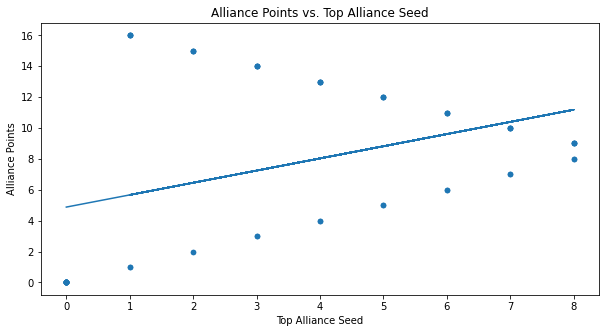

In [3]:
scatterplot(ranked_df, 'Top Alliance Seed', 'Alliance Points')

Disregard the stats and trendline here, this graph's purpose is just to help visualize how Alliance Points are awarded. It is a countdown from 16, with first captain and first pick getting 16, second captain & pick getting 15, and so on, until the first 2nd round pick (by alliance 8) gets 8, second 2nd round pick gets 7, and so forth. 

y = 0.3734548825710753x + 0.44370622167284735
R^2 = 0.756684431871143


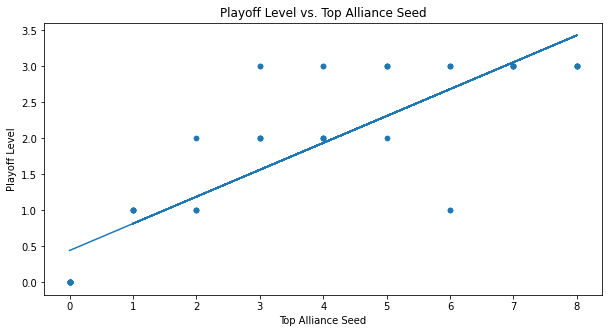

In [4]:
scatterplot(ranked_df, 'Top Alliance Seed', 'Playoff Level')
#TODO: Replace this with another graph type

All first seeded alliances made it to finals. All second seeded alliances made it past the first playoff round. The biggest outlier would be the sixth seeded alliance that made it to finals. Otherwise, none of the 6th, 7th or 8th seeded alliances made it past the first round. It appears that it is quite difficult to pull off a major upset during playoffs in Infinite Recharge.

---

y = 1.3837048727559649x + 2.8678240284079717
R^2 = 0.006942517323563577


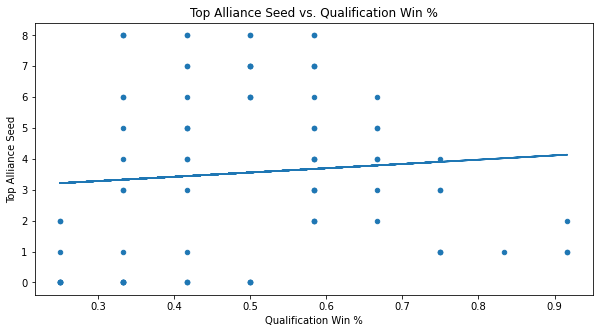

In [5]:
scatterplot(ranked_df, 'Qualification Win %', 'Top Alliance Seed')

y = 26.879857960149934x + -5.6072861182350255
R^2 = 0.6399389162575008


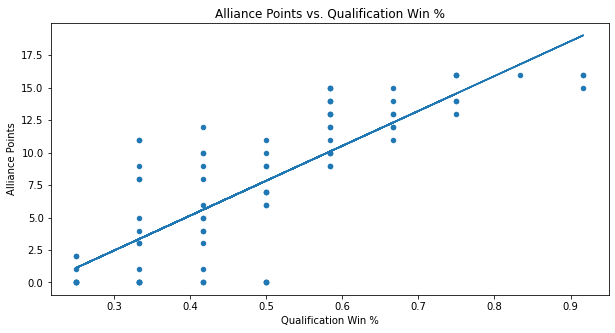

In [6]:
scatterplot(ranked_df, 'Qualification Win %', 'Alliance Points')

Any comparisons with seed likely won't yield a usable result due to the nature of alliance selection. Against alliance points there is information to be found. As expected, the more earlier a team is selected the higher their win rate during quals was. The vertical range increases as win % gets lower. Those teams are probably ranked lower and thus are being probably being picked because for the role they play on an alliance. This is a trend to look out for. As well, for a full picture this data would also need to be compared to playoff and qualification performance, so look out for those in other noteboks.

y = -0.5579216381605899x + 16.636971592072918
R^2 = 0.8156947895851931


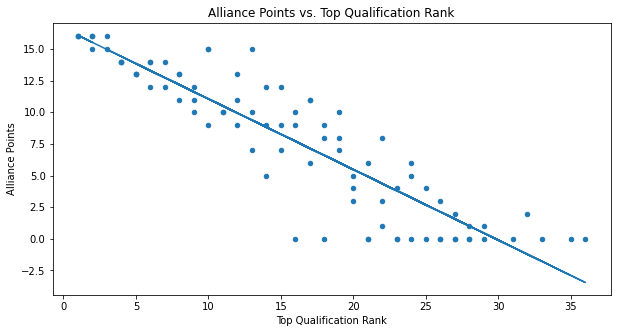

In [7]:
scatterplot(ranked_df, 'Top Qualification Rank', 'Alliance Points')

A very strong correlation. Obviously, whatever your rank is determines if/when you get to be a captain. But inter-picking typically happens between very similarly ranked teams especially very early in alliance selection, so the result is that the spread is very strongly correlated and tightly fitted at the top.

y = 1.0843613723194878x + -6.256505910956178
R^2 = 0.7666186532224405


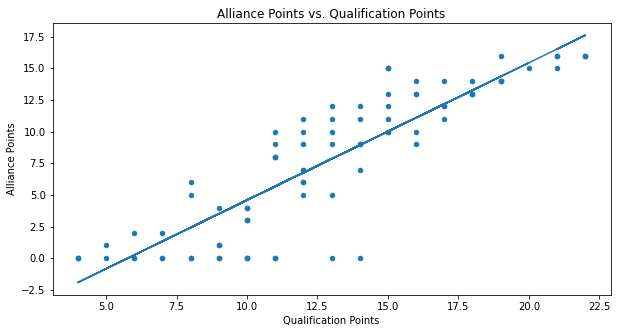

In [8]:
scatterplot(ranked_df, 'Qualification Points', 'Alliance Points')

A similar metric of qualification performance, the previous conclusions can be identified in this graph as well. Ranking Score, another closely related metric, includes this as well.

y = 12.032408201097095x + -6.26698527490368
R^2 = 0.7160697204553916


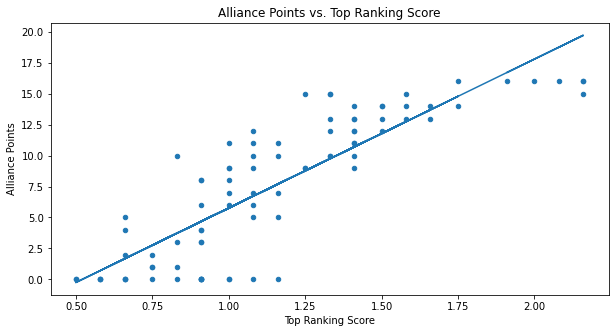

In [9]:
scatterplot(ranked_df, 'Top Ranking Score', 'Alliance Points')

---

y = 0.059652896391987974x + -12.597652864453755
R^2 = 0.4578798690869451


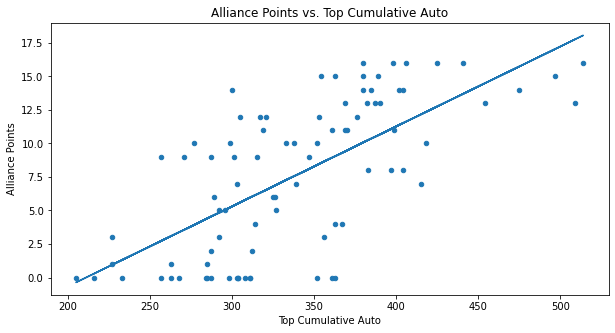

In [10]:
scatterplot(ranked_df, 'Top Cumulative Auto', 'Alliance Points')

Teams that played games with high amounts of points earned in auto generally appeared early in alliance selection but its certainly all over the place as well. The majority of points above the trendline fall within the midranges of the cumulative auto points, a sign that specialization is not necessarily the way to go.

y = 0.03245856792740281x + -5.6037358415579295
R^2 = 0.3334977452920211


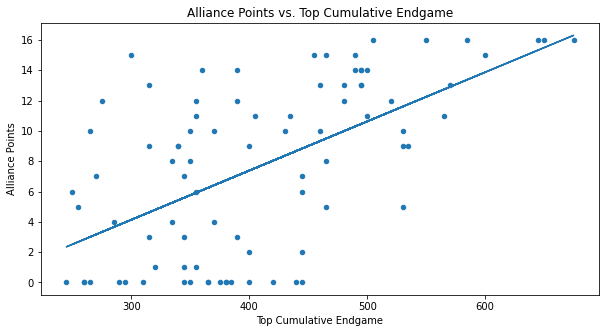

In [11]:
scatterplot(ranked_df, 'Top Cumulative Endgame', 'Alliance Points')

Not a whole lot of correlation here. I think that this is due to endgame being a focus of teams this year with lots of points available. Being able to execute a climb is an expectation and it may be difficult to stand out in this area without a particularly efficient and consistent climb. 

y = 0.038836229311698875x + -2.539338536959491
R^2 = 0.37683874714549936


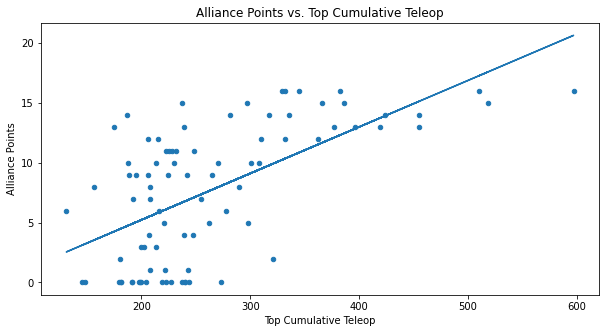

In [12]:
scatterplot(ranked_df, 'Top Cumulative Teleop', 'Alliance Points')

This looks like its in a similar situation as auto. It does seem like the potential is there to stand out here and in auto.

y = 0.021638245986538285x + -14.223723466374269
R^2 = 0.5983750019928271


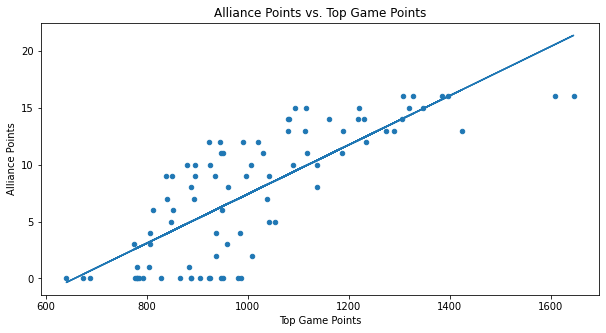

In [13]:
ranked_df['Top Game Points'] = ranked_df['Top Cumulative Auto'] + ranked_df['Top Cumulative Endgame'] + ranked_df['Top Cumulative Teleop']
scatterplot(ranked_df, 'Top Game Points', 'Alliance Points')

When combined, the correlation is definitely there. Teams should look to stand out and find the place that their team fits into their alliance. But general performance is still key. A versatile robot can pick up the slack for their teams in non-ideal situations. In alliance selection teams will look for a reliable robot that can keep the ball(s?) moving. 

---

In conclusion, during alliance selection, teams that do exceptionally in qualification are strongly favoured by the nature of alliance selection and the general approach of captaining teams in alliance selection. While looking for synergy is important, the most synergistic robots don't limit themselves but instead focus on consistency: consistency in earning points in all phases of the game and consistency in winning. There could be a somewhat psychological explanation as well, where teams that are memorable due to strong performances one way or another get chosen because teams think of them. All in all, teams should do their best to stand out.